<a href="https://colab.research.google.com/github/lisamarieholz/MachineLearning/blob/main/Deep_Learning_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


### 1.) Preprocess your data into scaled input variables and an output variable

##### check variables and missing values

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/ECON441B/CLV.csv')

In [ ]:
df.head()

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1


In [ ]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = MLPRegressor()
params = {'hidden_layer_sizes': [(10,),(5,20,), (10,50,), (10,100,10)],
         'activation': ['relu', 'logistic'],
         'alpha': [0.001, 0.01]}

In [ ]:
grid = GridSearchCV(clf, params, cv = 5) #cleared output warnings
grid.fit(X_train, y_train)

In [ ]:
print(grid.best_params_)

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (10, 100, 10)}


### 3.) Train a model with the optimal solution from GridSearch

In [ ]:
print('Best parameters:', grid.best_params_)
print('Best score:', grid.best_score_)

Best parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (10, 100, 10)}
Best score: 0.07573442892137902


In [ ]:
MLPRegressor(**grid.best_params_)

MLPRegressor(alpha=0.001, hidden_layer_sizes=(10, 100, 10))

In [ ]:
best_params = {'hidden_layer_sizes': (10,100,10),
         'activation': 'relu'}

mlp = MLPRegressor(**best_params, solver='adam',max_iter = 1000)

In [ ]:
mlp.fit(X_train,y_train)


c:\users\lisam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10, 100, 10), max_iter=1000)

### 4.) What are the in-sample and out of sample MSEs

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

In [ ]:
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
print('Train MSE = ',MSE_train)
print('Test MSE = ', MSE_test)

Train MSE =  41162370.773473606
Test MSE =  44640971.62107715


### 5.) Build a Keras NN with the architecture defined by GridSearchCV

In [ ]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X_train.shape[1]

16

In [ ]:
model = Sequential()

model.add(Dense(10, input_dim=X_train.shape[1], activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(loss='mse', optimizer = Adam(lr=0.0001)) #cleared output - too many rows
model.fit(X_train, y_train, batch_size=32, epochs=100)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                170       
                                                                 
 dense_1 (Dense)             (None, 100)               1100      
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 2,280
Trainable params: 2,280
Non-trainable params: 0
_________________________________________________________________


### 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [ ]:
from tensorflow.keras.utils import plot_model

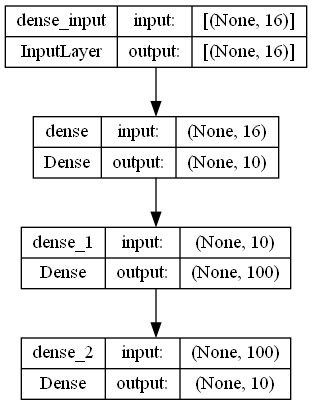

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
from ann_visualizer.visualize import ann_viz

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
ann_viz(model, title = 'CLV NN Viz')

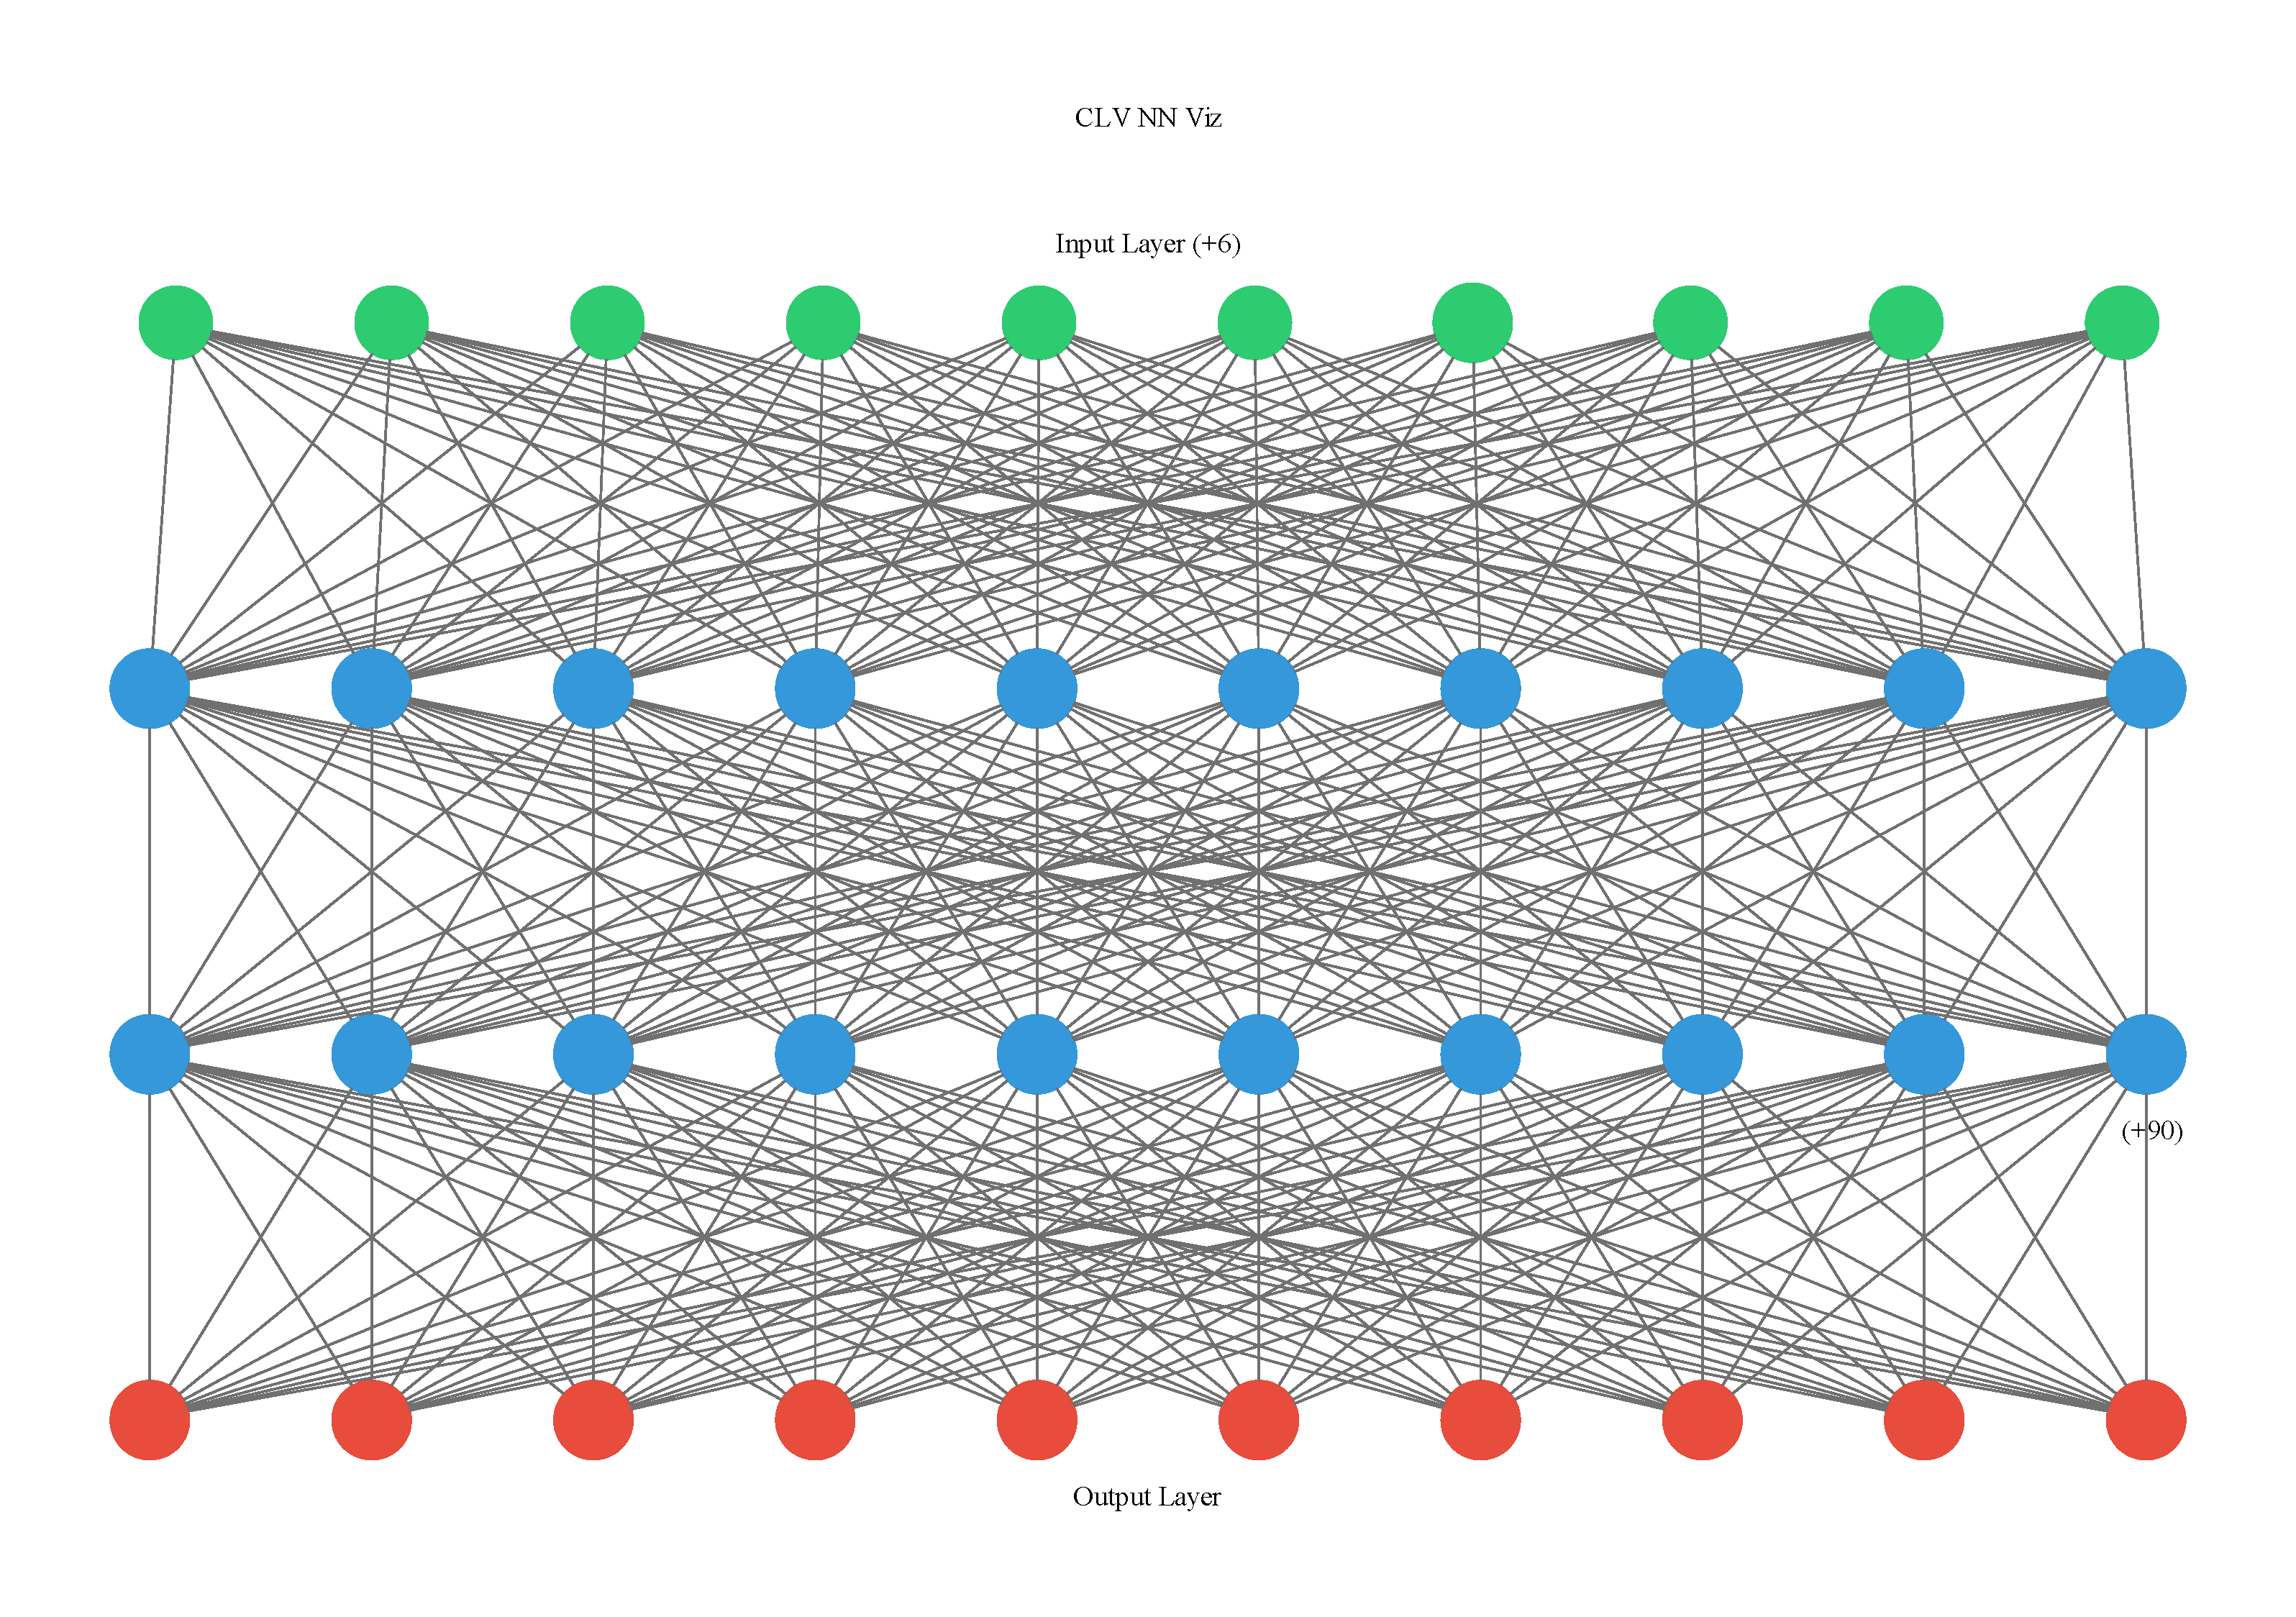